In [1]:
#Import library
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Atur input gambar
IMAGE_SIZE = [1400, 1400]

In [3]:
#Buat direktori
import os

base_dir = 'C:/Users/akip/Desktop/fix-vgg16/daun jeruk'
# Membuat direktori
os.makedirs(base_dir, exist_ok=True)

# Menampilkan isi dari direktori
print(os.listdir(base_dir))

['data', 'latih', 'validasi']


In [4]:
#menentukan direktorinya
data_dir = os.path.join(base_dir, 'data')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [5]:
from re import M

CVPD_dir = os.path.join(data_dir, 'CVPD/')
kankerjeruk_dir = os.path.join(data_dir, 'kankerjeruk/')
ulatpeliang_dir = os.path.join(data_dir, 'ulatpeliang/')
sehat_dir = os.path.join(data_dir, 'sehat/')


print("Jumlah Data Latih di Tiap Kelas")
print("Jumlah Gambar penyakit CVPD              = ", len(os.listdir(CVPD_dir)))
print("Jumlah Gambar penyakit_kanker_jeruk      = ", len(os.listdir(kankerjeruk_dir)))
print("Jumlah Gambar sehat                      = ", len(os.listdir(ulatpeliang_dir)))
print("Jumlah Gambar sehat                      = ", len(os.listdir(sehat_dir)))




Jumlah Data Latih di Tiap Kelas
Jumlah Gambar penyakit CVPD              =  50
Jumlah Gambar penyakit_kanker_jeruk      =  50
Jumlah Gambar sehat                      =  50
Jumlah Gambar sehat                      =  50


In [6]:
#Direktori isi latih
train_CVPD = os.path.join(train_dir, 'CVPD/')
train_kankerjeruk = os.path.join(train_dir, 'kankerjeruk/')
train_ulatpeliang = os.path.join(train_dir, 'ulatpeliang/')
train_sehat = os.path.join(train_dir, 'sehat/')

#Direktori isi uji
validation_CVPD = os.path.join(validation_dir, 'CVPD/')
validation_kankerjeruk = os.path.join(validation_dir, 'kankerjeruk/')
validation_ulatpeliang = os.path.join(validation_dir, 'ulatpeliang/')
validation_sehat = os.path.join(validation_dir, 'sehat/')

In [7]:
print("Jumlah Train CVPD                    = ", len(os.listdir(train_CVPD)))
print("Jumlah Train kankerjeruk             = ", len(os.listdir(train_kankerjeruk)))
print("Jumlah Train ulatpeliang             = ", len(os.listdir(train_ulatpeliang)))
print("Jumlah Train sehat                   = ", len(os.listdir(train_ulatpeliang)))

print('=======================================================================================')

print("Jumlah Validation CVPD               = ", len(os.listdir(validation_CVPD)))
print("Jumlah Validation kankerjeruk        = ", len(os.listdir(validation_kankerjeruk)))
print("Jumlah Validation ulatpeliang        = ", len(os.listdir(validation_ulatpeliang)))
print("Jumlah Validation ulatpeliang        = ", len(os.listdir(validation_sehat)))


Jumlah Train CVPD                    =  36
Jumlah Train kankerjeruk             =  36
Jumlah Train ulatpeliang             =  36
Jumlah Train sehat                   =  36
Jumlah Validation CVPD               =  9
Jumlah Validation kankerjeruk        =  9
Jumlah Validation ulatpeliang        =  9
Jumlah Validation ulatpeliang        =  9


In [8]:
# import keras
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from keras.optimizers import SGD  

# # VGG 16
# model = keras.Sequential()

# # Block 1
# model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(224, 224, 3)))
# model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 2
# model.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 3
# model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 4
# model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block 5
# model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(Conv2D(512, kernel_size=(3, 3), padding="same", activation="relu"))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Top
# model.add(Flatten())
# model.add(Dense(4096, activation="relu"))
# model.add(Dense(4096, activation="relu"))
# model.add(Dense(4, activation="softmax"))

# # Compile the model with Gradient Descent with Momentum optimizer
# optimizer = SGD(learning_rate=0.001, momentum=0.9)  # Set learning rate and momentum values
# model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# model.summary()


In [9]:
#Download pre-trained model VGG16
vgg = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=max,
    classes=1000,
    classifier_activation="softmax",
)
vgg.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0    

In [10]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [11]:
#Buat parameter sebelumnya tidak dilatih lagi
for layer in vgg.layers:
  layer.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from keras.models import Model
from keras.layers import Dense

# Mengambil output dari layer sebelum layer prediksi 1000
x = vgg.layers[-2].output

# Membuat layer prediksi baru dengan 4 unit dan nama 'prediction'
predictions = Dense(4, activation='softmax', name='prediksi')(x)

# Membuat model baru
model = Model(inputs=vgg.input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
from keras import optimizers
import tensorflow as tf


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Definisikan metrik F1
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

# Inisialisasi optimizer
adam = optimizers.Adam()

# Kompilasi model
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=[
                  'accuracy',
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
                  F1Score(name='f1_score')
              ])



In [14]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 144 images belonging to 4 classes.


In [17]:
val_set = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 36 images belonging to 4 classes.


In [22]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

from keras.utils import to_categorical

checkpoint = ModelCheckpoint(filepath="model.keras", verbose=3, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=4,
  validation_steps=1,
  callbacks=callbacks,
  verbose=3)


duration = datetime.now() - start
print("Waktu Latih : ", duration)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.42759, saving model to model.keras
Epoch 2/20

Epoch 2: val_loss did not improve from 0.42759
Epoch 3/20

Epoch 3: val_loss did not improve from 0.42759
Epoch 4/20

Epoch 4: val_loss did not improve from 0.42759
Epoch 5/20

Epoch 5: val_loss improved from 0.42759 to 0.42541, saving model to model.keras
Epoch 6/20

Epoch 6: val_loss improved from 0.42541 to 0.39762, saving model to model.keras
Epoch 7/20

Epoch 7: val_loss improved from 0.39762 to 0.37015, saving model to model.keras
Epoch 8/20

Epoch 8: val_loss did not improve from 0.37015
Epoch 9/20

Epoch 9: val_loss did not improve from 0.37015
Epoch 10/20

Epoch 10: val_loss did not improve from 0.37015
Epoch 11/20

Epoch 11: val_loss did not improve from 0.37015
Epoch 12/20

Epoch 12: val_loss did not improve from 0.37015
Epoch 13/20

Epoch 13: val_loss did not improve from 0.37015
Epoch 14/20

Epoch 14: val_loss did not improve from 0.37015
Epoch 15/20

Epoch 15: val_loss did 

In [19]:
# from datetime import datetime
# from keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint(filepath='mymodel.h5',
#                                verbose=2, save_best_only=True)

# callbacks = [checkpoint]

# start = datetime.now()

# model_history = model.fit(
#   train_set,
#   validation_data=val_set,
#   epochs=20,
#   steps_per_epoch=40,
#   validation_steps=10,
#   callbacks=callbacks,
#   verbose=2)

# duration = datetime.now() - start
# print("Waktu Latih : ", duration)


Epoch 1/20



Epoch 1: val_loss improved from inf to 0.52687, saving model to mymodel.h5


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 - 14s - loss: 0.6475 - accuracy: 0.3333 - precision: 0.3600 - recall: 0.1875 - f1_score: 0.2466 - val_loss: 0.5269 - val_accuracy: 0.4722 - val_precision: 0.6667 - val_recall: 0.3333 - val_f1_score: 0.4444 - 14s/epoch - 348ms/step
Waktu Latih :  0:00:14.515786


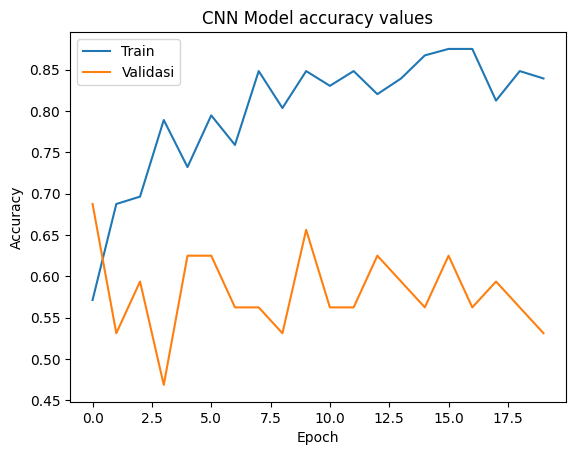

In [23]:
# Plot Akurasi
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()


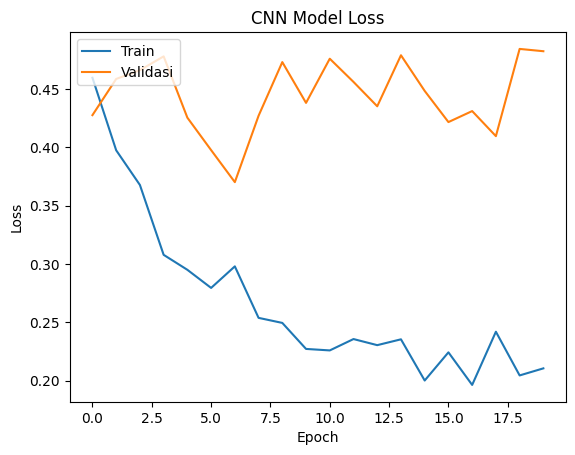

In [25]:
# Plot Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validasi'], loc='upper left')
plt.show()

In [1]:
import numpy as np
from keras.preprocessing import image
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QFileDialog
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import load_model
# Ensure the model has been trained and is ready to use
model = load_model('model.keras')
# assert model is not None, "Model belum diinisialisasi."

class_list = ['CVPD', 'KANKER', 'ULATPELIANG', 'SEHAT']  # Daftar kelas

y_pred = []
y_true = []


class MyApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.select_button = QPushButton("Select File", self)
        self.select_button.clicked.connect(self.select_file)

        self.setGeometry(300, 300, 250, 150)
        self.setWindowTitle('File Upload')
        self.show()

    def select_file(self):
        filename, _ = QFileDialog.getOpenFileName(self, "Select File")
        if filename:
            # Prediction code with the selected file
            path = filename
            img = image.load_img(path, target_size=(224, 224))  # Size must match the model input
            imgplot = plt.imshow(img)
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)

            images = np.vstack([x])
            classes = model.predict(images, batch_size=10)

            print(filename)

            predicted_class = np.argmax(classes[0])  # Get the index with the highest probability

            print('This image is predicted as ', class_list[predicted_class])
            print('')
            print('')
            print('=======================================================================================================')
            print('')
            print('')
            y_pred.append(predicted_class)

            # Extract the true label from the file name
            true_label = filename.split(' ')[0].lower()  # Use the last part of the split as the class name
            true_label = true_label.upper()
            print("ini true label", true_label)
            y_true.append(class_list.index(true_label))  # add the true label to y_true

            # Now that we have all the predictions and true labels, we can calculate the confusion matrix
            confusion_mat = confusion_matrix(y_true, y_pred)

            # Plot the confusion matrix
            plt.figure(figsize=(10, 7))
            sns.heatmap(confusion_mat, annot=True, cmap='Blues', xticklabels=class_list, yticklabels=class_list)
            plt.xlabel('Predicted labels')
            plt.ylabel('True labels')
            plt.show()


if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = MyApp()
    sys.exit(app.exec_())


TypeError: Could not locate class 'F1Score'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': None, 'class_name': 'F1Score', 'config': {'name': 'f1_score', 'dtype': 'float32'}, 'registered_name': 'F1Score'}